# CREDIT CARD FRAUD DETECTION MODEL
The logistic regression model detects credit card fraud by analyzing transaction time, amount, and other critical features.

## IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report,accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## LOADING DATASET

In [2]:
df=pd.read_csv("creditcard.csv", encoding="latin-1")

## READING DATASET

In [3]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## VISUALIZING DATASET

+ SCATTER PLOT

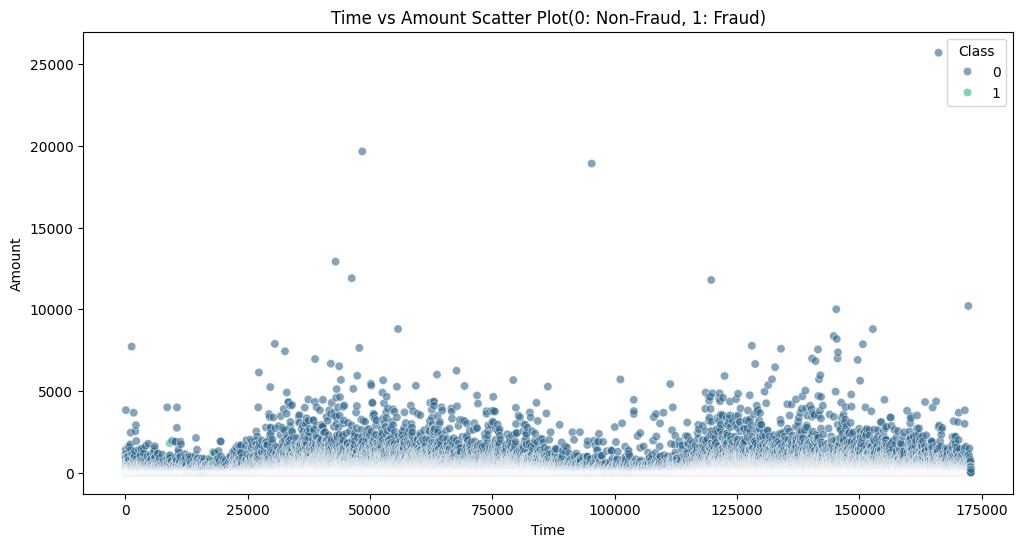

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette='viridis', alpha=0.6)
plt.title('Time vs Amount Scatter Plot(0: Non-Fraud, 1: Fraud)')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()


+ HISTOGRAM OF 'AMOUNT' COLUMN

<Axes: xlabel='Class', ylabel='Count'>

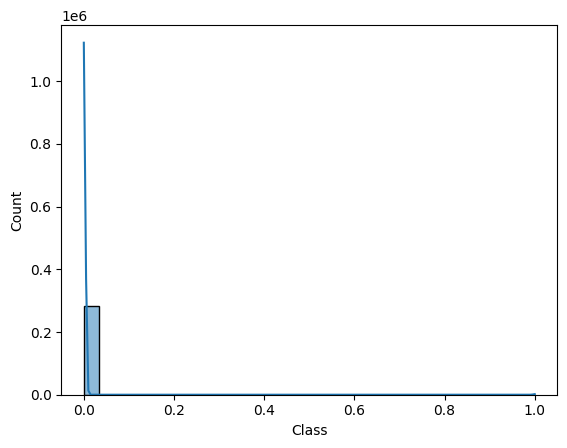

In [6]:
sns.histplot(df['Class'],bins=30, kde=True)


+ BOXPLOT ANALYSIS

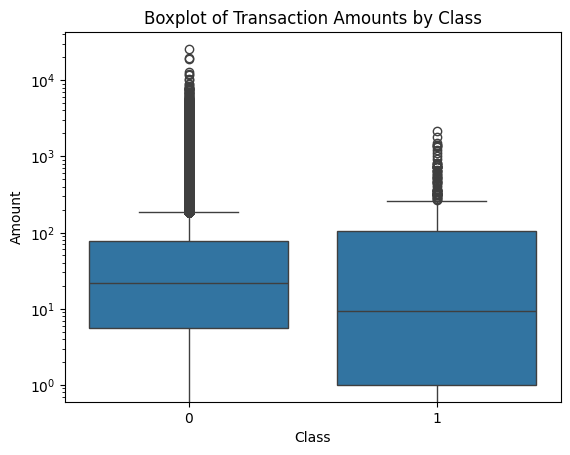

In [7]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Transaction Amounts by Class')
plt.yscale('log')
plt.show()

+ COUNT PLOT

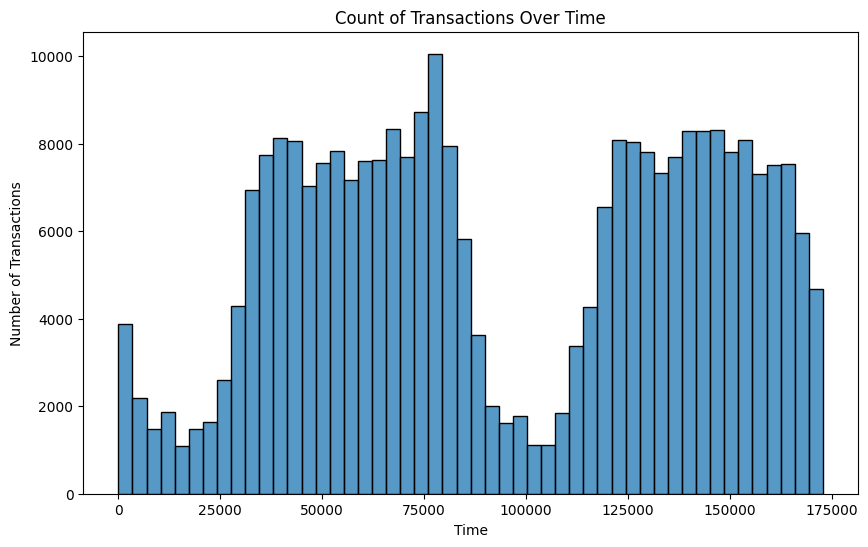

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=False)
plt.title('Count of Transactions Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.show()


+ HEATMAP OF DATASET

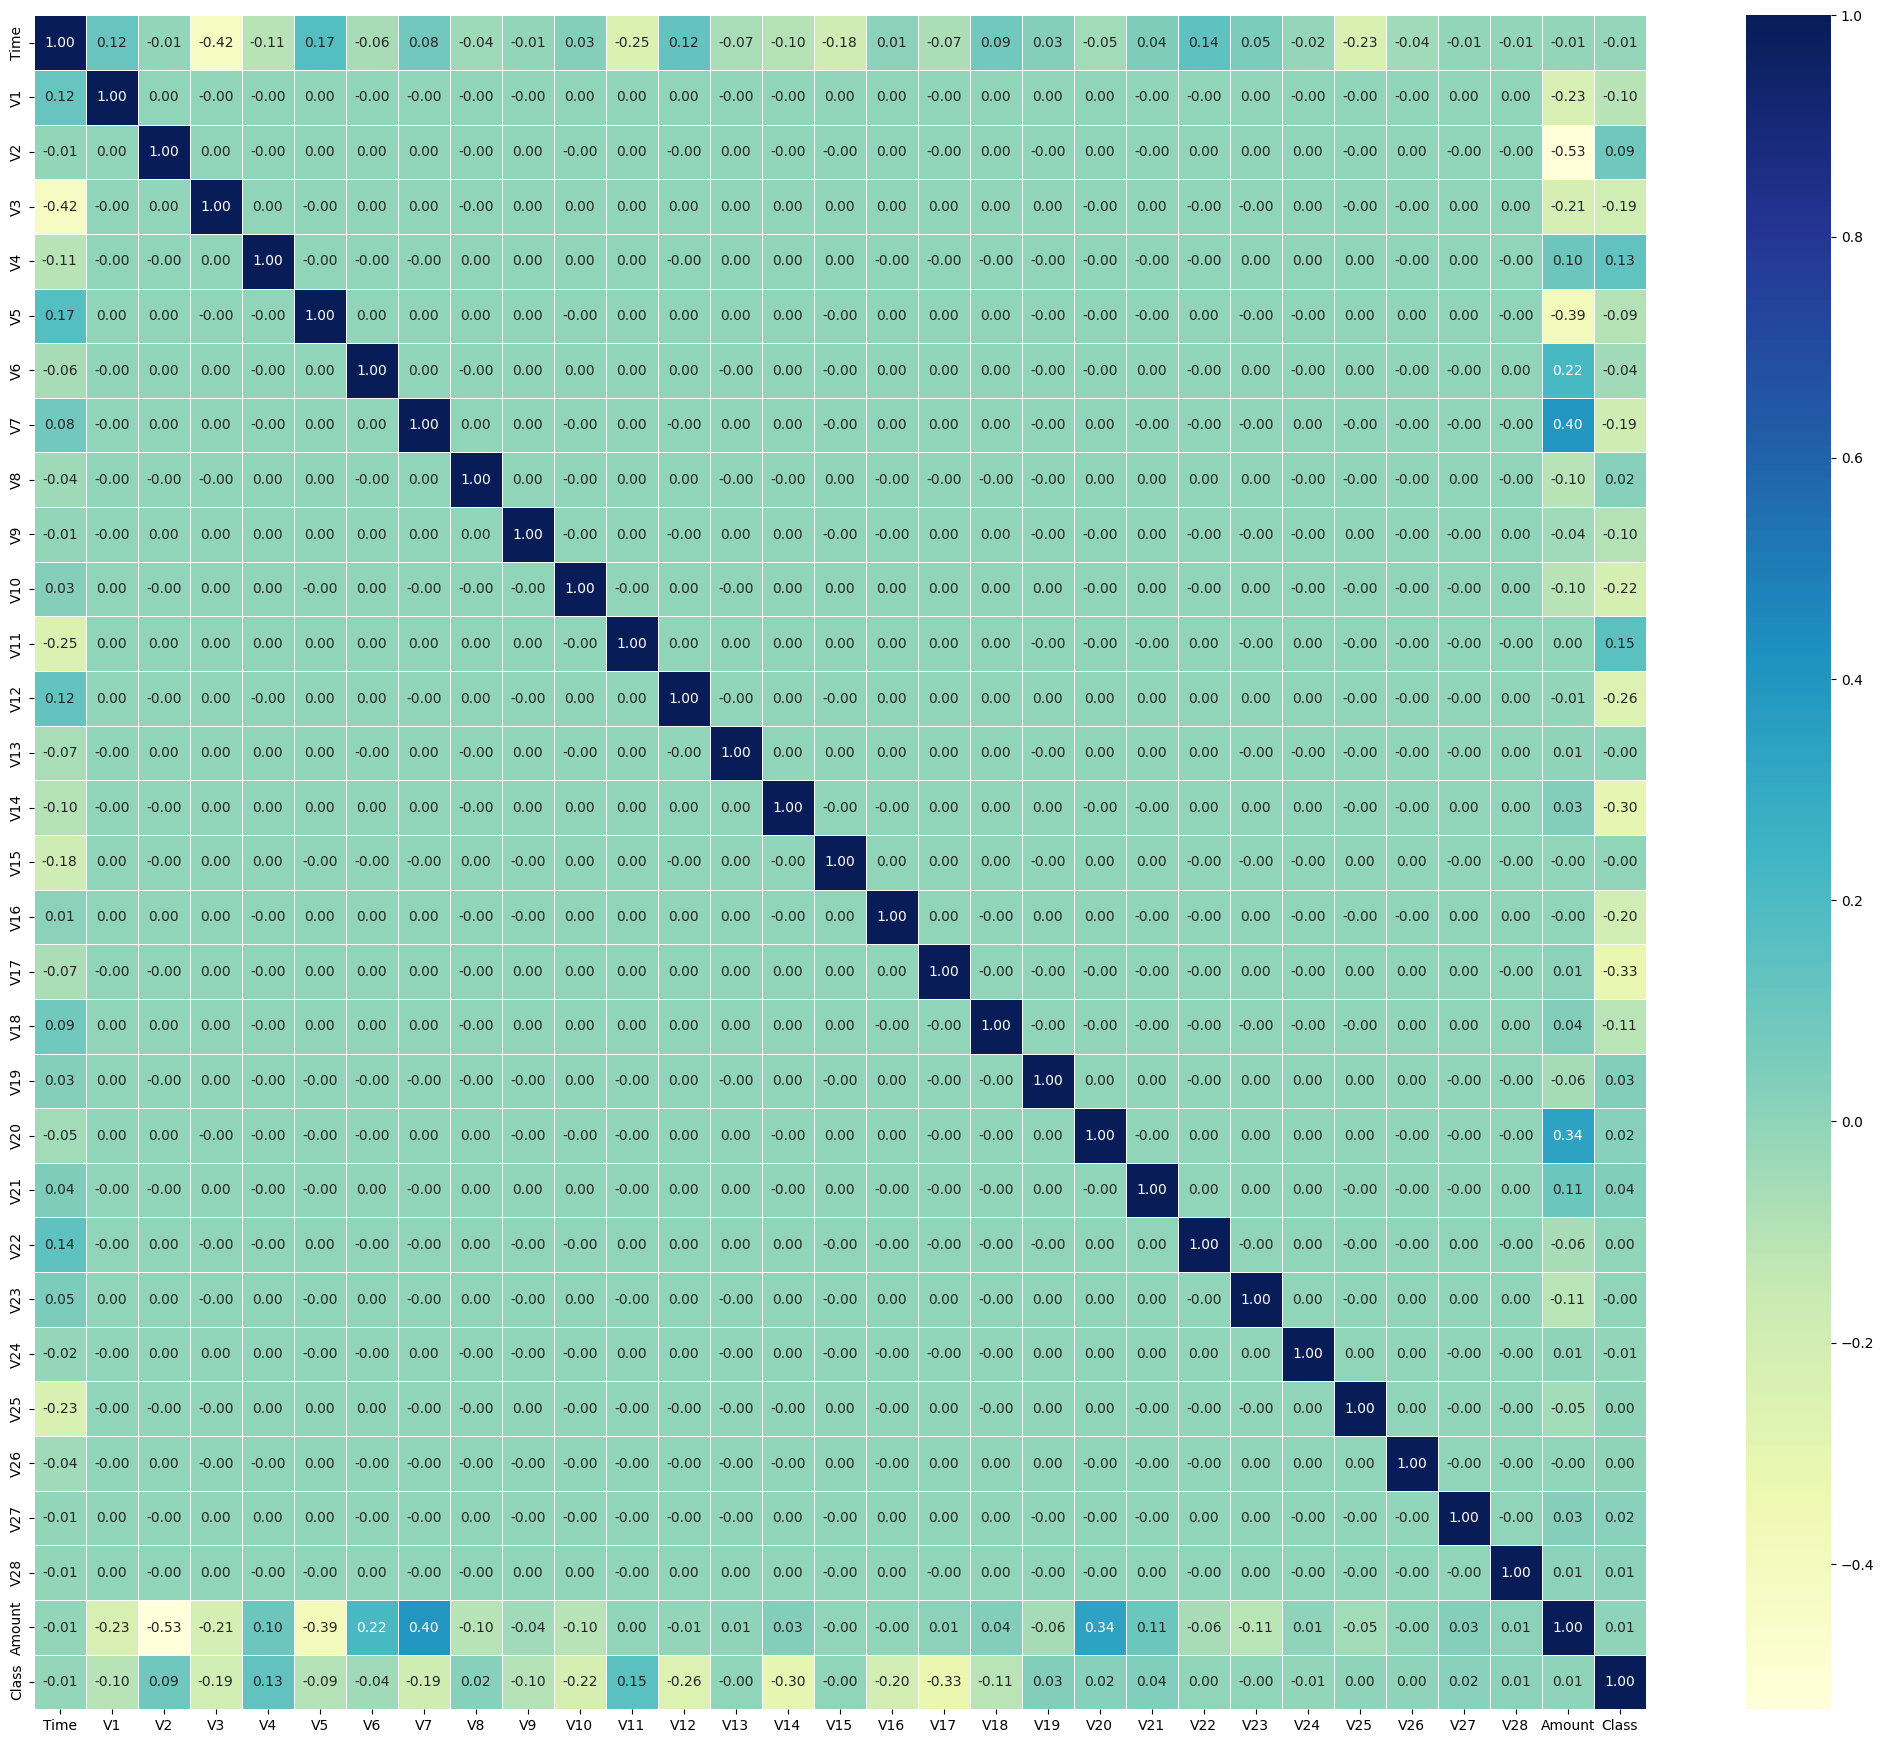

In [9]:
plt.figure(figsize=(26,22))
cor=df.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu',fmt=".2f",linewidths=0.5)
plt.show()

## HANDLING IMBALANCES OF DATA

+ REMOVING DUPLICATED ROWS

In [10]:
print(df.duplicated().sum())
df.shape

1081


(284807, 31)

In [11]:
df = df.drop_duplicates()
df.duplicated().sum()

0

## SELECTING BEST FEATURES

+ USING SELECT KBEST METHODS USING MUTUAL INFORMATION

In [12]:
X1=df.drop(columns='Class',axis=1)
Y1=df['Class']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3,random_state=42)

Mutual Information: [1.50650194e-03 1.87284307e-03 3.15819946e-03 4.73534518e-03
 4.97675008e-03 2.21307494e-03 2.06504163e-03 3.75893663e-03
 1.54005613e-03 4.17662661e-03 7.46169354e-03 6.74404262e-03
 7.51837014e-03 1.43118499e-04 7.89875828e-03 3.47587522e-05
 5.83844212e-03 7.99365376e-03 3.94323587e-03 1.05603241e-03
 8.66550851e-04 2.24631462e-03 2.08495265e-04 4.73188510e-04
 3.72517386e-04 1.98340302e-04 9.57304053e-05 2.23226057e-03
 1.54335614e-03 1.43942424e-03]


<Axes: >

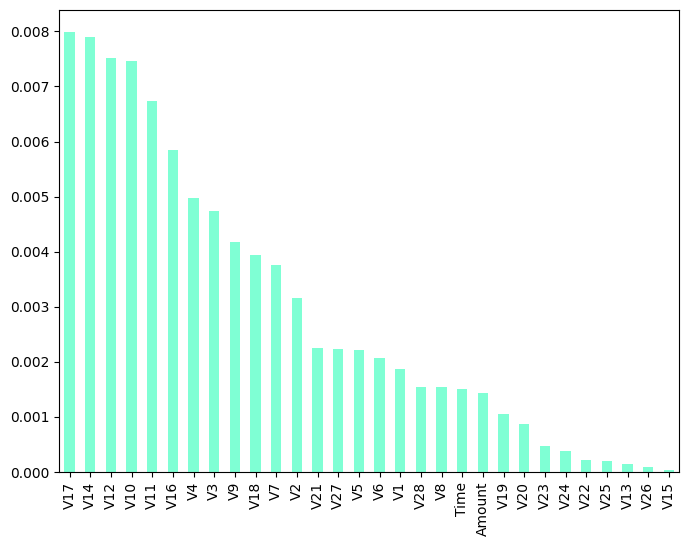

In [13]:
mutual_info=mutual_info_classif(X1_train,Y1_train)
print("Mutual Information:",mutual_info)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X1_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(8,6),color='aquamarine')

In [14]:
from sklearn.feature_selection import SelectKBest
cols=SelectKBest(mutual_info_classif,k=4)
cols.fit(X1_train,Y1_train)
X1_train.columns[cols.get_support()]

Index(['V10', 'V12', 'V14', 'V17'], dtype='object')

In [15]:
x=df[['V17', 'V14','Time','Amount']]
y=df['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## APPLYING LOGISTIC REGRESSION METHOD

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

+ ANALYSING MODEL PERFORMANCE

In [17]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {round(train_accuracy,2)}")
print(f"Testing Accuracy: {round(test_accuracy,2)}")


Training Accuracy: 1.0
Testing Accuracy: 1.0


In [18]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Non-Fraud', 'Fraud']))

Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     84972
       Fraud       0.29      0.52      0.37       146

    accuracy                           1.00     85118
   macro avg       0.64      0.76      0.68     85118
weighted avg       1.00      1.00      1.00     85118



+ CONFUSION MATRIX

Text(0.5, 1.0, 'Confusion Matrix')

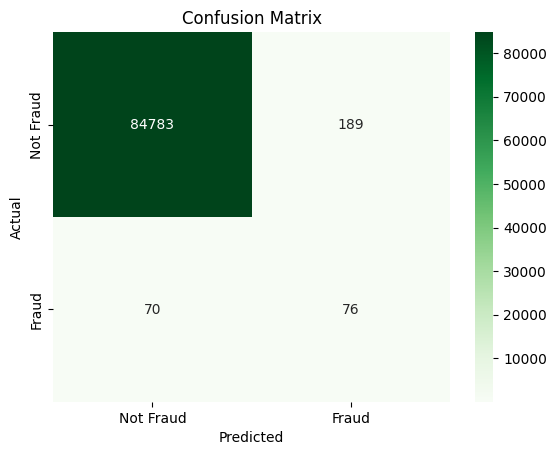

In [19]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

+ ROC-AUC CURVE

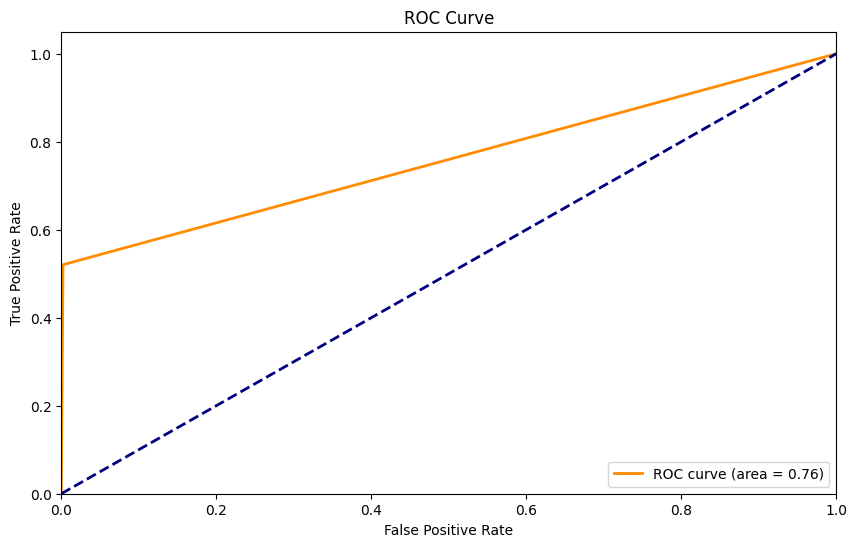

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## PREDICTING OVER NEW DATA

In [21]:
new_transaction = {
    'V17': 1.71,
    'V14': -0.4169,
    'Time': 1000000,
    'Amount': 10.0}
new_transaction_df = pd.DataFrame([new_transaction])

new_transaction_pred = model.predict(new_transaction_df)

print(f'Prediction for new transaction: {"Fraud" if new_transaction_pred[0] == 1 else "Not Fraud"}')

Prediction for new transaction: Not Fraud
